Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 1992: 49.37%
Actual mean Democratic votes for 1992: 42.25%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 1996: 45.05%
Actual mean Democratic votes for 1996: 47.65%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2000: 45.87%
Actual mean Democratic votes for 2000: 46.02%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2004: 46.71%
Actual mean Democratic votes for 2004: 46.55%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2008: 46.63%
Actual mean Democratic votes for 2008: 51.36%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2012: 47.39%
Actual mean Democratic votes for 2012: 49.04%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2016: 51.16%
Actual mean Democ

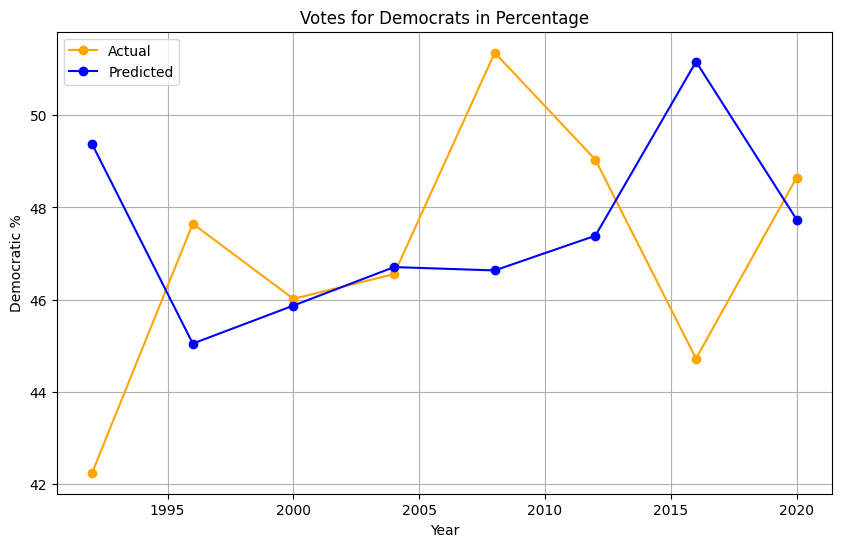

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Convert 'Year' to integer type
data['Year'] = data['Year'].astype(int)

# Function to train the model and predict for a specific year
def train_and_predict(year):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    # Prepare data for training
    X_train = pd.get_dummies(df_training[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    y_train = df_training['Democratic %']
    
    # Prepare data for testing
    X_test = pd.get_dummies(df_testing[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    
    # Ensure the columns match between training and testing sets
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate mean predicted and actual votes for the testing year
    mean_predicted_votes = y_pred.mean() * 100
    mean_actual_votes = df_testing['Democratic %'].mean() * 100

    print(f"Predicted mean Democratic votes for {year}: {mean_predicted_votes:.2f}%")
    print(f"Actual mean Democratic votes for {year}: {mean_actual_votes:.2f}%")

    return mean_predicted_votes, mean_actual_votes

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

for year in years:
    predicted, actual = train_and_predict(year)
    all_predicted_votes.append(predicted)
    all_actual_votes.append(actual)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()


Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 1992: 38.50%
Actual mean Democratic votes for 1992: 42.25%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 1996: 46.08%
Actual mean Democratic votes for 1996: 47.65%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2000: 43.36%
Actual mean Democratic votes for 2000: 46.02%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2004: 41.76%
Actual mean Democratic votes for 2004: 46.55%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2008: 49.34%
Actual mean Democratic votes for 2008: 51.36%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2012: 49.88%
Actual mean Democratic votes for 2012: 49.04%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2016: 54.21%
Actual mean Democ

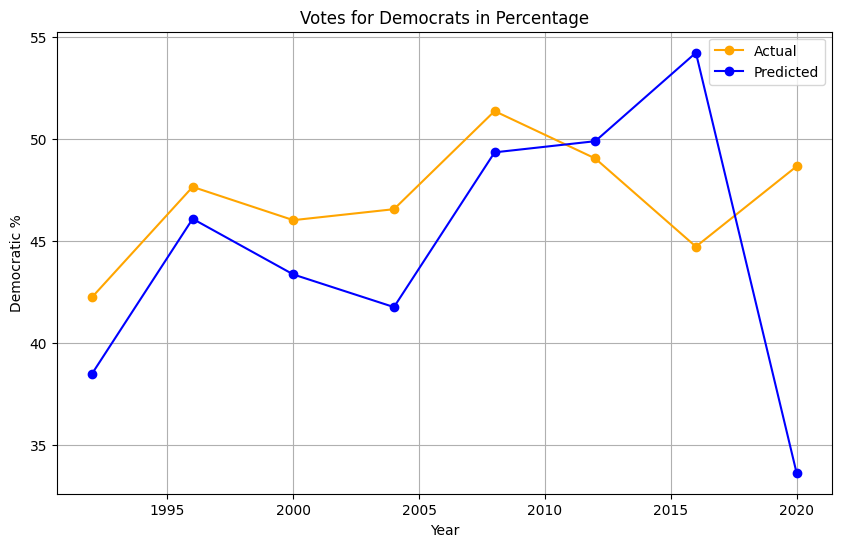

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Convert 'Year' to integer type
data['Year'] = data['Year'].astype(int)

# Function to train the model and predict for a specific year using polynomial regression
def train_and_predict_polynomial(year, degree=2):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    # Prepare data for training
    X_train = pd.get_dummies(df_training[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    y_train = df_training['Democratic %']
    
    # Prepare data for testing
    X_test = pd.get_dummies(df_testing[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    
    # Ensure the columns match between training and testing sets
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train_poly, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_poly)
    
    # Calculate mean predicted and actual votes for the testing year
    mean_predicted_votes = y_pred.mean() * 100
    mean_actual_votes = df_testing['Democratic %'].mean() * 100

    print(f"Predicted mean Democratic votes for {year}: {mean_predicted_votes:.2f}%")
    print(f"Actual mean Democratic votes for {year}: {mean_actual_votes:.2f}%")

    return mean_predicted_votes, mean_actual_votes

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

for year in years:
    predicted, actual = train_and_predict_polynomial(year)
    all_predicted_votes.append(predicted)
    all_actual_votes.append(actual)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

Linear Regression: MAE = 0.0906
Polynomial Regression (2nd degree): MAE = 1553.2045
Ridge Regression: MAE = 0.0827
Lasso Regression: MAE = 0.0827
Random Forest Regression: MAE = 0.0525
Gradient Boosting Regression: MAE = 0.0518
Predicted Democratic % for Alabama in 2024: 0.3656


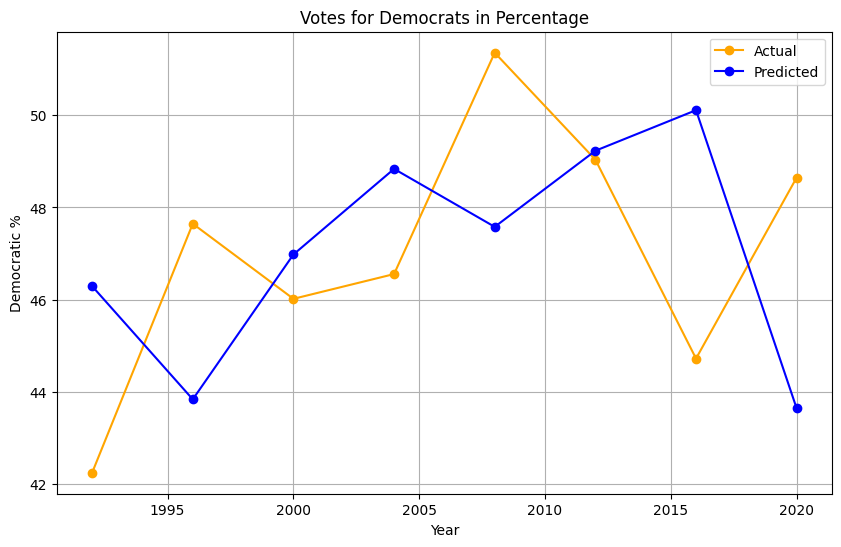

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Convert 'Year' to integer type
data['Year'] = data['Year'].astype(int)

# Prepare the data
X = pd.get_dummies(data[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
y = data['Democratic %']

# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (2nd degree)": make_pipeline(PolynomialFeatures(degree=4), LinearRegression()),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=5)
    return -scores.mean()

# Evaluate each model
model_performance = {name: evaluate_model(model, X, y) for name, model in models.items()}

# Print model performance
for model_name, performance in model_performance.items():
    print(f"{model_name}: MAE = {performance:.4f}")

# Select the best model
best_model_name = min(model_performance, key=model_performance.get)
best_model = models[best_model_name]

# Train the best model on the entire dataset
best_model.fit(X, y)

# Predict for a specific year (e.g., 2024)
def predict_democratic_percentage(year, state, gun_ownership, hdi, unemployment):
    state_columns = X.columns[X.columns.str.startswith('State_')]
    state_data = {col: 0 for col in state_columns}
    if f'State_{state}' in state_data:
        state_data[f'State_{state}'] = 1
    
    input_data = {'Year': year, 'Gun ownership %': gun_ownership, 'HDI': hdi, 'Unemployment %': unemployment}
    input_data.update(state_data)
    
    input_df = pd.DataFrame([input_data])
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    
    return best_model.predict(input_df)[0]

# Example prediction
example_prediction = predict_democratic_percentage(2024, 'Alabama', 0.55, 0.87, 0.06)
print(f'Predicted Democratic % for Alabama in 2024: {example_prediction:.4f}')

# Plotting the performance of the best model over the years
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

for year in years:
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    X_train = pd.get_dummies(df_training[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    y_train = df_training['Democratic %']
    X_test = pd.get_dummies(df_testing[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    mean_predicted_votes = y_pred.mean() * 100
    mean_actual_votes = df_testing['Democratic %'].mean() * 100

    all_predicted_votes.append(mean_predicted_votes)
    all_actual_votes.append(mean_actual_votes)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\szczy\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
21:11:24 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\linear_regression.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\linear_regression.exe
21:12:05 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\linear_regression.exe
21:12:05 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:


21:12:08 - cmdstanpy - INFO - CmdStan done processing.
21:12:08 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



                  Mean      MCSE     StdDev          5%         50%  \
lp__       -1161.39000  0.037045   1.372820 -1164.10000 -1161.07000   
alpha         37.99180  0.033641   1.458120    35.54770    37.97980   
beta_HDI      14.73610  0.050710   2.243200    11.03110    14.74870   
beta_G         5.23968  0.079759   4.316920    -2.04041     5.20077   
sigma         10.14290  0.006003   0.338781     9.59052    10.13620   
...                ...       ...        ...         ...         ...   
y_rep[404]    48.76590  0.162451  10.232700    32.38170    48.75810   
y_rep[405]    50.15900  0.160356  10.013800    33.64530    50.18210   
y_rep[406]    50.67150  0.166591  10.305500    33.29380    50.64880   
y_rep[407]    51.15490  0.163140  10.221800    34.33850    51.34220   
y_rep[408]    50.46550  0.157163  10.078300    33.75150    50.57140   

                  95%    N_Eff  N_Eff/s     R_hat  
lp__       -1159.7700  1373.28  227.440  1.000860  
alpha         40.4151  1878.62  311.133  1

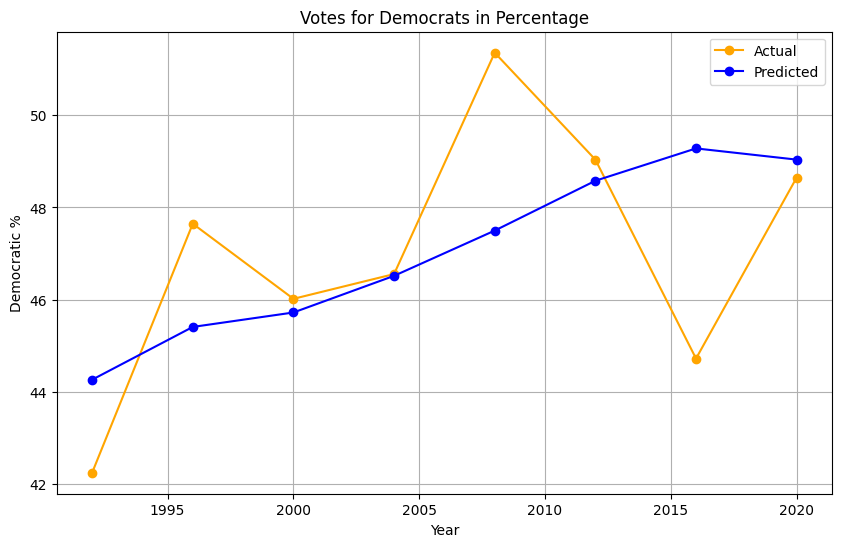

In [1]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Ensure correct data types
data['Year'] = data['Year'].astype(int)

# Extract required columns
HDI = data['HDI'].values.reshape(-1, 1)
Gun_ownership = data['Gun ownership %'].values.reshape(-1, 1)
Democratic_percentage = data['Democratic %'].values * 100  # Scaling to percentage

# Normalize the predictors to [0, 1] range
scaler = MinMaxScaler()
HDI_scaled = scaler.fit_transform(HDI)
Gun_ownership_scaled = scaler.fit_transform(Gun_ownership)

# Prepare the data for Stan
stan_data = {
    'N': len(Democratic_percentage),
    'HDI': HDI_scaled.flatten(),
    'G': Gun_ownership_scaled.flatten(),
    'V': Democratic_percentage
}

# Compile the Stan model
stan_file = 'linear_regression.stan'
model = CmdStanModel(stan_file=stan_file)

# Sample from the model
fit = model.sample(data=stan_data, chains=4, seed=42)

# Print summary of the fit
print(fit.summary())

# Extract predictions
y_rep = fit.stan_variable('y_rep').mean(axis=0)

# Plotting the actual vs predicted
years = data['Year'].unique()
all_predicted_votes = []
all_actual_votes = []

for year in years:
    df_testing = data[data['Year'] == year]
    y_pred_year = y_rep[df_testing.index]
    mean_predicted_votes = y_pred_year.mean()
    mean_actual_votes = df_testing['Democratic %'].mean() * 100  # Scaling to percentage
    
    all_predicted_votes.append(mean_predicted_votes)
    all_actual_votes.append(mean_actual_votes)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

21:14:36 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\linear_prior.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\linear_prior.exe
21:15:13 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\linear_prior.exe
21:15:13 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


21:15:15 - cmdstanpy - INFO - CmdStan done processing.


21:15:15 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 991 divergent transitions (99.1%)
	Chain 2 had 992 divergent transitions (99.2%)
	Chain 3 had 990 divergent transitions (99.0%)
	Chain 4 had 992 divergent transitions (99.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
C:\Users\szczy\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\szczy\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\szczy\AppData\Roaming\Python\Python312\site-packages\matplotlib\axes\_axes.py:6973: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\szczy\AppData\Roaming\Python\Python312\site-packages\matplotlib\axes\_axes

ValueError: autodetected range of [nan, nan] is not finite

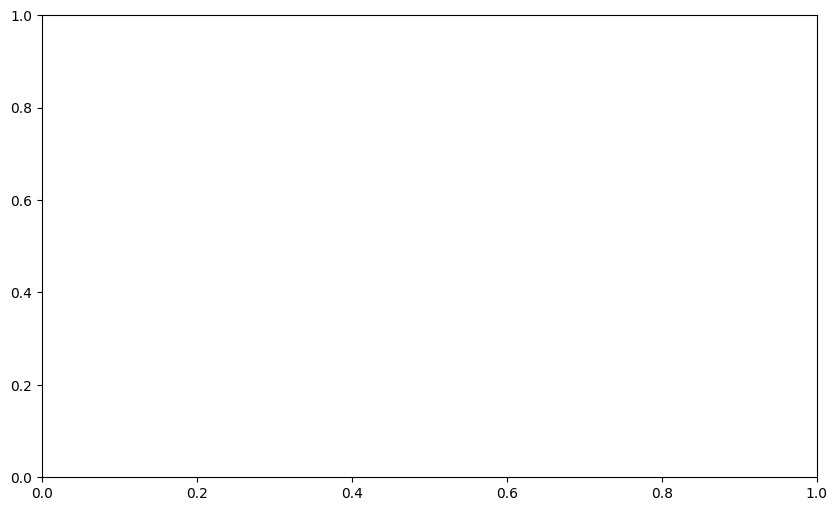

In [2]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Ensure correct data types
data['Year'] = data['Year'].astype(int)

# Extract required columns
HDI = data['HDI'].values.reshape(-1, 1)
Gun_ownership = data['Gun ownership %'].values.reshape(-1, 1)
Democratic_percentage = data['Democratic %'].values * 100  # Scaling to percentage

# Normalize the predictors to [0, 1] range
scaler = MinMaxScaler()
HDI_scaled = scaler.fit_transform(HDI)
Gun_ownership_scaled = scaler.fit_transform(Gun_ownership)

# Prepare the data for Stan
stan_data = {
    'N': len(Democratic_percentage),
    'HDI': HDI_scaled.flatten(),
    'G': Gun_ownership_scaled.flatten()
}

# Compile the Stan model
stan_file = 'linear_prior.stan'  # Updated model file name
model = CmdStanModel(stan_file=stan_file)

# Sample from the model
fit = model.sample(data=stan_data, chains=4, seed=42)

# Extract prior predictive checks
y_prior = fit.stan_variable('y_prior').mean(axis=0)

# Plot prior predictive distribution
plt.figure(figsize=(10, 6))
plt.hist(y_prior, bins=30, alpha=0.7, label='Prior Predictive Distribution')
plt.axvline(np.mean(Democratic_percentage), color='r', linestyle='dashed', linewidth=1, label='Actual Mean')
plt.xlabel('Democratic %')
plt.ylabel('Frequency')
plt.title('Prior Predictive Checks')
plt.legend()
plt.show()

21:23:58 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\linear_regression.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\linear_regression.exe
21:24:39 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\linear_regression.exe
21:24:39 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▍    | 00:01 Iteration: 1000 / 2000 [ 50%]  (Warmup)








chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 0


21:24:43 - cmdstanpy - INFO - CmdStan done processing.



                  Mean      MCSE   StdDev          5%         50%        95%  \
lp__       -1151.14000  0.039325  1.63804 -1154.29000 -1150.79000 -1149.1500   
alpha         33.78750  0.038147  1.72204    30.94870    33.82030    36.6543   
beta_HDI      15.33210  0.046084  2.25388    11.71090    15.34220    18.9917   
beta_G         4.98523  0.068297  4.19853    -1.81911     4.91964    12.1239   
beta_U        12.37470  0.051803  2.68886     8.00474    12.35560    16.7645   
...                ...       ...      ...         ...         ...        ...   
y_rep[404]    46.84880  0.157824  9.89267    30.16660    46.73730    63.3177   
y_rep[405]    47.39320  0.156980  9.92395    31.00050    47.60260    63.9319   
y_rep[406]    50.42840  0.154514  9.78924    34.10120    50.51330    66.0075   
y_rep[407]    50.52980  0.152545  9.66335    34.77520    50.67210    66.4301   
y_rep[408]    50.65620  0.152345  9.87065    34.44080    50.65340    66.8255   

              N_Eff  N_Eff/s     R_hat

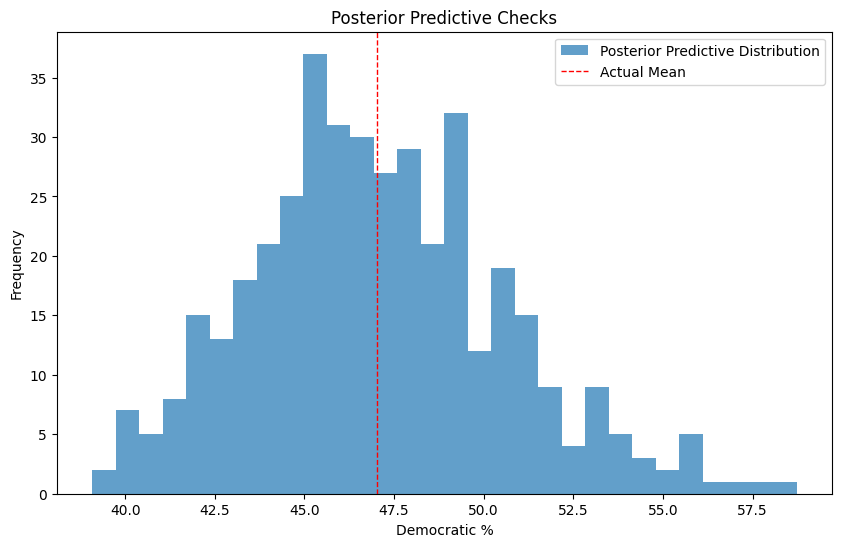

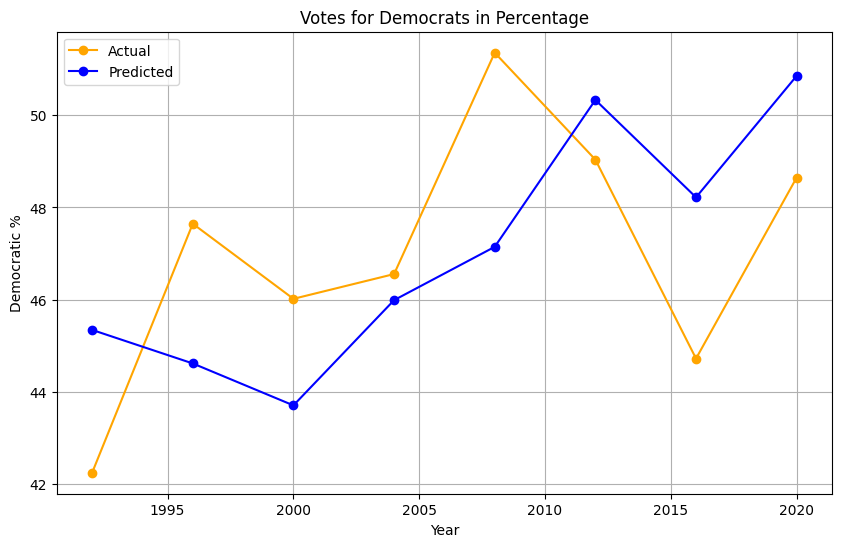

In [6]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Ensure correct data types
data['Year'] = data['Year'].astype(int)

# Extract required columns
HDI = data['HDI'].values.reshape(-1, 1)
Gun_ownership = data['Gun ownership %'].values.reshape(-1, 1)
Unemployment = data['Unemployment %'].values.reshape(-1, 1)
Democratic_percentage = data['Democratic %'].values * 100  # Scaling to percentage

# Normalize the predictors to [0, 1] range
scaler = MinMaxScaler()
HDI_scaled = scaler.fit_transform(HDI)
Gun_ownership_scaled = scaler.fit_transform(Gun_ownership)
Unemployment_scaled = scaler.fit_transform(Unemployment)

# Prepare the data for Stan
stan_data = {
    'N': len(Democratic_percentage),
    'HDI': HDI_scaled.flatten(),
    'G': Gun_ownership_scaled.flatten(),
    'U': Unemployment_scaled.flatten(),
    'V': Democratic_percentage
}

# Compile the Stan model
stan_file = 'linear_regression.stan'
model = CmdStanModel(stan_file=stan_file)

# Sample from the model
fit = model.sample(data=stan_data, chains=4, seed=42)

# Print summary of the fit
print(fit.summary())

# Extract posterior predictive checks
y_rep = fit.stan_variable('y_rep').mean(axis=0)

# Plot posterior predictive checks
plt.figure(figsize=(10, 6))
plt.hist(y_rep, bins=30, alpha=0.7, label='Posterior Predictive Distribution')
plt.axvline(np.mean(Democratic_percentage), color='r', linestyle='dashed', linewidth=1, label='Actual Mean')
plt.xlabel('Democratic %')
plt.ylabel('Frequency')
plt.title('Posterior Predictive Checks')
plt.legend()
plt.show()

# Plotting the actual vs predicted
years = data['Year'].unique()
all_predicted_votes = []
all_actual_votes = []

for year in years:
    df_testing = data[data['Year'] == year]
    y_pred_year = y_rep[df_testing.index]
    mean_predicted_votes = y_pred_year.mean()
    mean_actual_votes = df_testing['Democratic %'].mean() * 100  # Scaling to percentage
    
    all_predicted_votes.append(mean_predicted_votes)
    all_actual_votes.append(mean_actual_votes)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Ensure correct data types
data['Year'] = data['Year'].astype(int)

# Extract required columns
HDI = data['HDI'].values.reshape(-1, 1)
Gun_ownership = data['Gun ownership %'].values.reshape(-1, 1)
Unemployment = data['Unemployment %'].values.reshape(-1, 1)
Democratic_percentage = data['Democratic %'].values * 100  # Scaling to percentage

# Normalize the predictors to [0, 1] range
scaler = MinMaxScaler()
HDI_scaled = scaler.fit_transform(HDI)
Gun_ownership_scaled = scaler.fit_transform(Gun_ownership)
Unemployment_scaled = scaler.fit_transform(Unemployment)

# Factorize the state column to get unique state indices
state_codes, state_indices = pd.factorize(data['State'])

# Prepare the data for Stan
stan_data = {
    'N': len(Democratic_percentage),
    'K': 3,  # Number of predictors
    'J': len(state_codes),  # Number of unique states
    'state': state_indices + 1,  # 1-based index for Stan
    'X': np.column_stack((HDI_scaled, Gun_ownership_scaled, Unemployment_scaled)),
    'y': Democratic_percentage
}

# Compile the Stan model
stan_file = 'hierarchical_model.stan'
model = CmdStanModel(stan_file=stan_file)

# Sample from the model
fit = model.sample(data=stan_data, chains=4, seed=42)

# Print summary of the fit
print(fit.summary())

# Extract posterior predictive checks
y_rep = fit.stan_variable('y_rep').mean(axis=0)

# Plot posterior predictive checks
plt.figure(figsize=(10, 6))
plt.hist(y_rep, bins=30, alpha=0.7, label='Posterior Predictive Distribution')
plt.axvline(np.mean(Democratic_percentage), color='r', linestyle='dashed', linewidth=1, label='Actual Mean')
plt.xlabel('Democratic %')
plt.ylabel('Frequency')
plt.title('Posterior Predictive Checks')
plt.legend()
plt.show()

# Plotting the actual vs predicted
years = data['Year'].unique()
all_predicted_votes = []
all_actual_votes = []

for year in years:
    df_testing = data[data['Year'] == year]
    y_pred_year = y_rep[df_testing.index]
    mean_predicted_votes = y_pred_year.mean()
    mean_actual_votes = df_testing['Democratic %'].mean() * 100  # Scaling to percentage
    
    all_predicted_votes.append(mean_predicted_votes)
    all_actual_votes.append(mean_actual_votes)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

TypeError: can only concatenate str (not "int") to str